In [ ]:
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4
#!pip install plotly==5.3.1

import pandas as pd
import requests
from bs4 import BeautifulSoup

/bin/bash: line 1: mamba: command not found
/bin/bash: line 1: mamba: command not found


In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

data  = requests.get(url).text
print(data)

In [ ]:
soup = BeautifulSoup(data, 'html5lib')

netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"])

In [ ]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text

    # Create a new row as a dictionary
    new_row = {"Date": date, "Open": Open, "High": high, "Low": low, "Close": close, "Adj Close": adj_close, "Volume": volume}

    # Append the new row to the DataFrame
    netflix_data = pd.concat([netflix_data, pd.DataFrame([new_row])], ignore_index=True)

netflix_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,"78,560,600"
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,"66,927,600"
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,"111,573,300"
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,"90,183,900"
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,"61,902,300"


In [ ]:
read_html_pandas_data = pd.read_html(url)

read_html_pandas_data = pd.read_html(str(soup))

netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


# **Extracting Stock Data Using a Web Scraping**
1. Extracting data using BeautifulSoup

    Download the web page Using Requests Library

    Parse HTML on a web page using BeautifulSoup

    Extract data and duild a data frame
2. Extracting data using pandas

3. Exercise

We will extract Netflix stock data https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html.

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

In [ ]:
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')

netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

In [ ]:
# Loop through each row and extract column values
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date, Open, high, low, close, adj_close, volume = [c.text for c in col]

    # Append data to the DataFrame using concat
    netflix_data = pd.concat([netflix_data, pd.DataFrame({"Date": [date], "Open": [Open], "High": [high], "Low": [low], "Close": [close], "Volume": [volume]})], ignore_index=True)

In [ ]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600"
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600"
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300"
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900"
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300"


# **Question 1: Use `yfinance` to Extract Stock Data**

Reset the index, save, and display the first five rows of the `tesla_data` dataframe using the `head` function.

In [ ]:
import yfinance as yf

In [ ]:
tesla_data = yf.Ticker("TSLA").history(period="1mo")

tesla_data.reset_index(inplace=True)

tesla_data.to_csv('tesla_stock_data.csv', index=False)

In [ ]:
print(tesla_data.head())

                       Date        Open        High         Low       Close  \
0 2024-04-22 00:00:00-04:00  140.559998  144.440002  138.800003  142.050003   
1 2024-04-23 00:00:00-04:00  143.330002  147.259995  141.110001  144.679993   
2 2024-04-24 00:00:00-04:00  162.839996  167.970001  157.509995  162.130005   
3 2024-04-25 00:00:00-04:00  158.960007  170.880005  158.360001  170.179993   
4 2024-04-26 00:00:00-04:00  168.850006  172.119995  166.369995  168.289993   

      Volume  Dividends  Stock Splits  
0  107097600        0.0           0.0  
1  124545100        0.0           0.0  
2  181178000        0.0           0.0  
3  126427500        0.0           0.0  
4  109815700        0.0           0.0  


# **Question 2: Use Webscraping to Extract Tesla Revenue Data**

Display the last five rows of the `tesla_revenue` dataframe using the `tail` function.


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Define the URL to scrape Tesla's revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Step 2: Get the HTML content from the URL
html_data = requests.get(url).text

# Step 3: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, "html5lib")

# Step 4: Find all tables in the HTML content
tables = soup.find_all('table')

# Step 5: Identify the table containing "Tesla Quarterly Revenue"
table_index = None
for index, table in enumerate(tables):
    if "Tesla Quarterly Revenue" in str(table):
        table_index = index
        break

# Check if the table_index was found
if table_index is not None:
    print(f"Table index with Tesla Quarterly Revenue: {table_index}")

    # Step 6: Initialize an empty DataFrame to store the revenue data
    tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

    # Step 7: Loop through the rows of the identified table and extract data
    for row in tables[table_index].tbody.find_all('tr'):
        col = row.find_all('td')
        if col:
            date = col[0].text.strip()
            revenue = col[1].text.strip()
            # Append the extracted data to the DataFrame
            tesla_revenue = tesla_revenue.append({'Date': date, 'Revenue': revenue}, ignore_index=True)

    # Step 8: Clean the revenue data by removing commas and dollar signs
    tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

    # Step 9: Drop rows with missing values
    tesla_revenue.dropna(inplace=True)

    # Step 10: Remove rows where the revenue is an empty string
    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

    # Step 11: Display the last five rows of the cleaned DataFrame
    print(tesla_revenue.tail(5))
else:
    print("Tesla Quarterly Revenue table not found.")


Tesla Quarterly Revenue table not found.


# **Question 3: Use `yfinance` to Extract Stock Data**

Reset the index, save, and display the first five rows of the `gme_data` dataframe using the `head` function.

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Get GameStop stock data
gamestop = yf.Ticker('GME')

# Fetch historical data for GameStop
gme_data = gamestop.history(period='max')

# Reset the index to make 'Date' a column
gme_data.reset_index(inplace=True)

# Display the first 5 rows of the data
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [ ]:
# Analyze the data
print(f"Number of rows: {len(gme_data)}")
print(f"Date range: {gme_data['Date'].min()} to {gme_data['Date'].max()}")

Number of rows: 5606
Date range: 2002-02-13 00:00:00-05:00 to 2024-05-21 00:00:00-04:00


In [ ]:
# Calculate daily returns
gme_data['Returns'] = gme_data['Close'].pct_change()

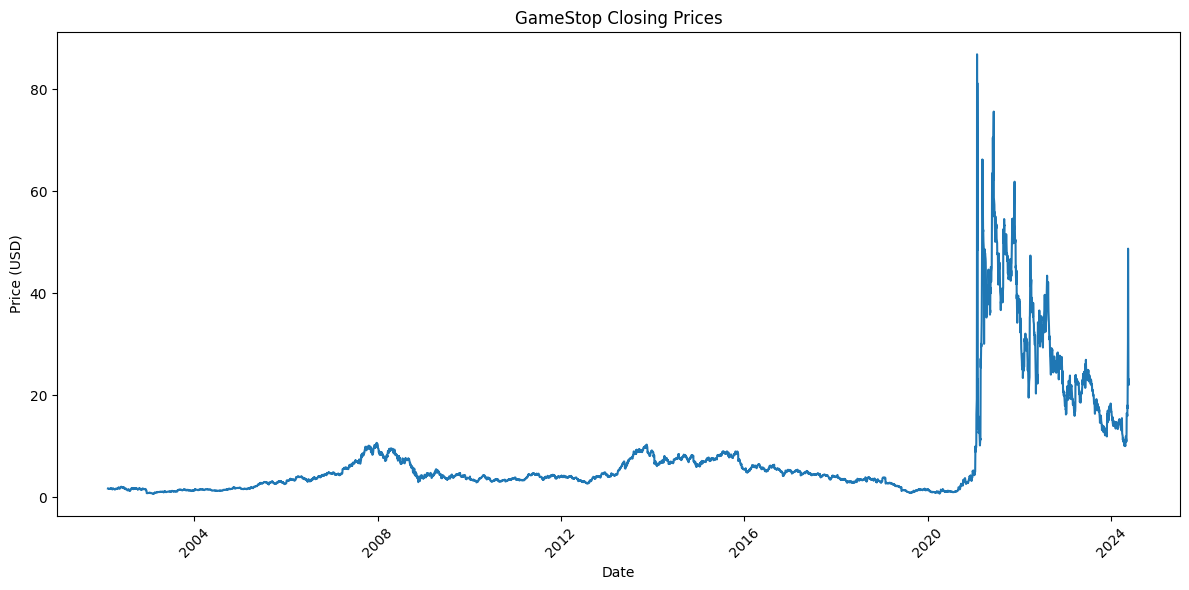

In [ ]:
# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(gme_data['Date'], gme_data['Close'])
plt.title('GameStop Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

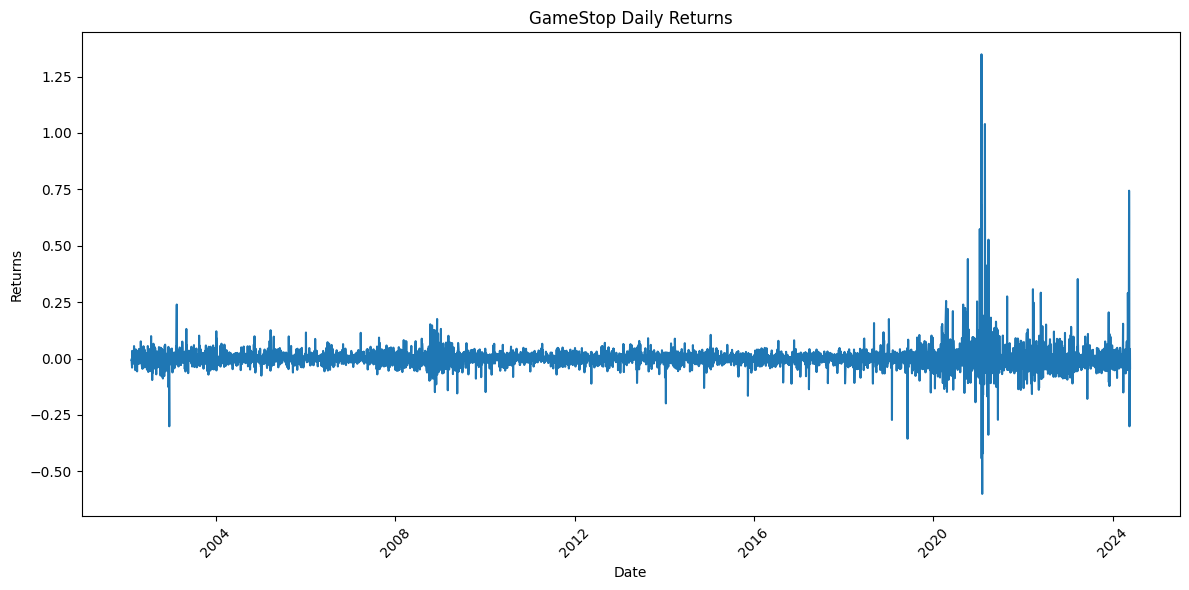

In [ ]:
# Plot the daily returns
plt.figure(figsize=(12, 6))
plt.plot(gme_data['Date'], gme_data['Returns'])
plt.title('GameStop Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Question 4: Use Webscraping to Extract GME Revenue Data**

Display the last five rows of the `gme_revenue` dataframe using the `tail `function.

In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [44]:
# Define the URL to scrape
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Get the HTML content from the URL
html_data = requests.get(url).text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, "html5lib")

In [45]:
# Find the table containing GameStop Quarterly Revenue
tables = soup.find_all('table')
for index, table in enumerate(tables):
    if "GameStop Quarterly Revenue" in str(table):
        table_index = index

In [ ]:
# Create a DataFrame to store the revenue data
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Loop through each row in the table
for row in tables[table_index].tbody.find_all('tr'):
    col = row.find_all('td')
    if col != []:
        date = col[0].text
        revenue = col[1].text
        gme_revenue = gme_revenue.append({'Date': date, 'Revenue': revenue}, ignore_index=True)



In [ ]:
# Clean the 'Revenue' column by removing commas and dollar signs
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', '')

# Drop any rows with missing values and empty revenue values
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [ ]:
gme_revenue.tail(5)

# **Question 5: Plot Tesla Stock Graph**

Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph.

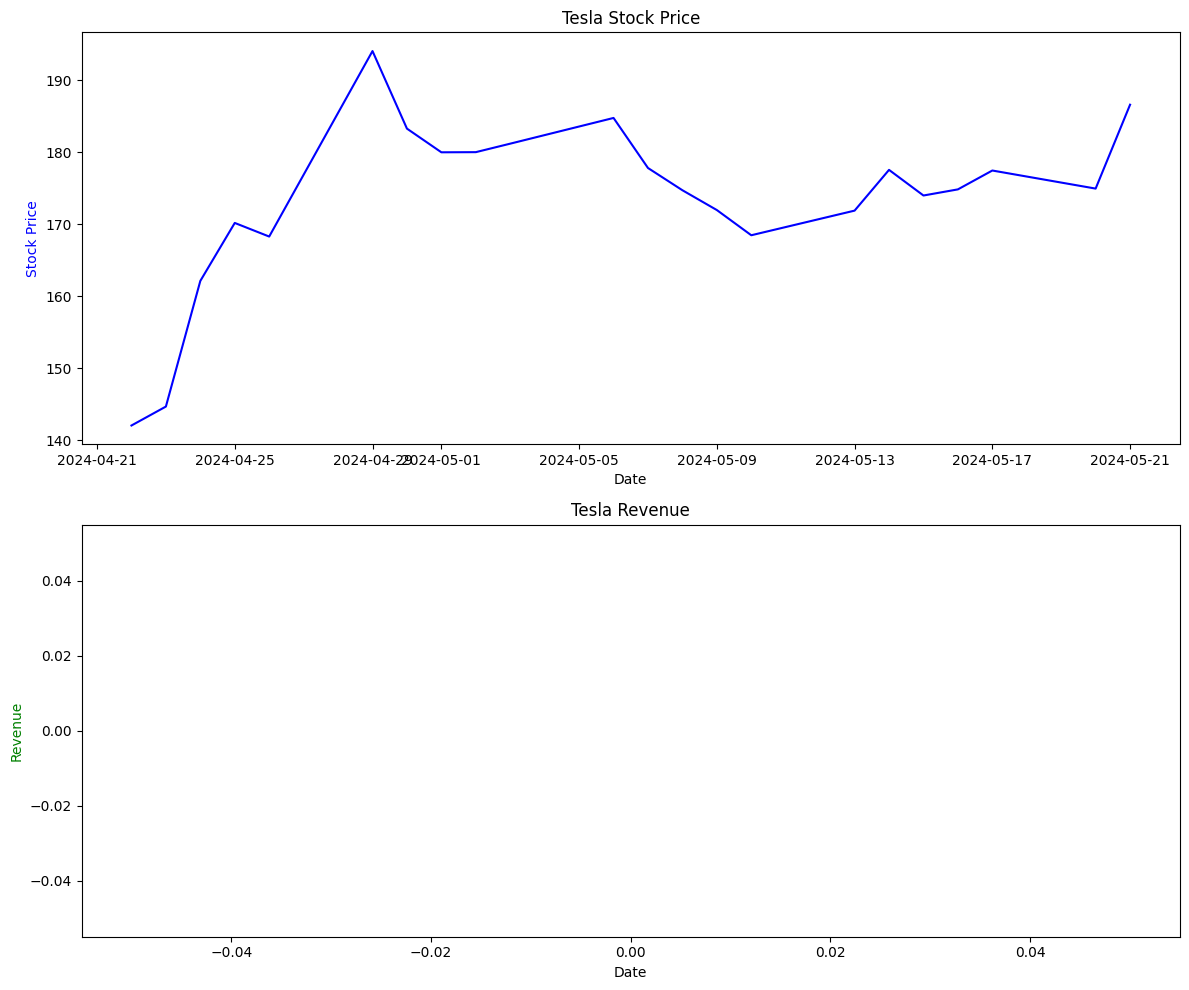

In [54]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, company_name):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot for Stock Price
    ax1.plot(stock_data['Date'], stock_data['Close'], color='b')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='b')
    ax1.set_title(f'{company_name} Stock Price')

    # Plot for Revenue
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='g')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Revenue', color='g')
    ax2.set_title(f'{company_name} Revenue')

    plt.tight_layout()
    plt.show()

# Call the make_graph function for Tesla data
make_graph(tesla_data, tesla_revenue, 'Tesla')

# **Question 6: Plot GameStop Stock Graph**

Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph.

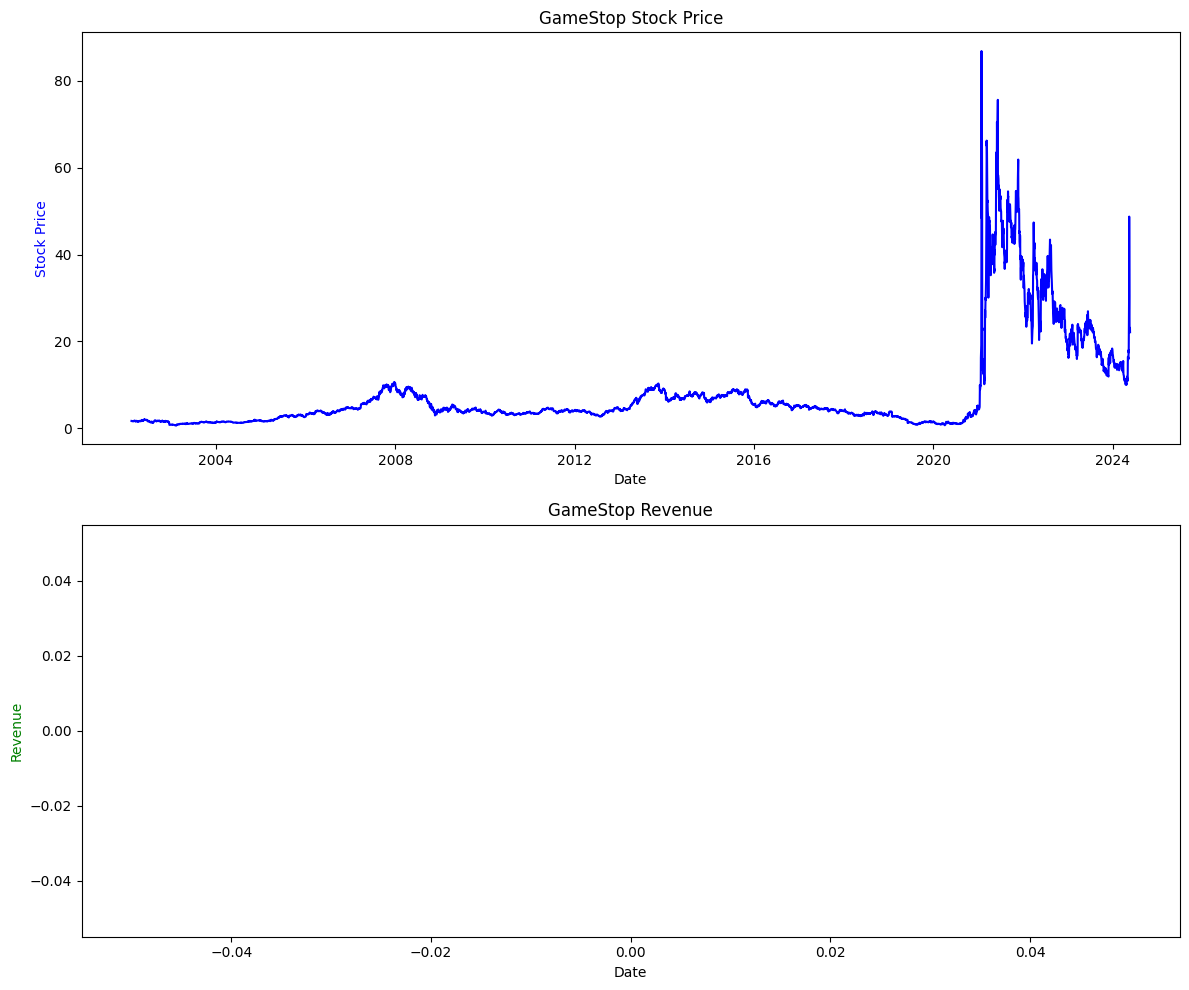

In [55]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, company_name):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot for Stock Price
    ax1.plot(stock_data['Date'], stock_data['Close'], color='b')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='b')
    ax1.set_title(f'{company_name} Stock Price')

    # Plot for Revenue
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='g')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Revenue', color='g')
    ax2.set_title(f'{company_name} Revenue')

    plt.tight_layout()
    plt.show()

# Call the make_graph function for GameStop
make_graph(gme_data, gme_revenue, 'GameStop')